# Exploratory Data Analysis

Exploratory Data Analysis is apporoach to analyze datasets and understand the hidden insights of datasets. 

# Step 1 
Importing all required libraries,dataset and analysis of the datasest. 

In [1]:
#Importing all required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset can be loaded using pd.read_csv() command. 

In [2]:
#Loading the data set
df=pd.read_csv('data.csv')

First five rows of the dataset are returned by df.head() command to take closer look of the dataset

In [3]:
#Displaying first 5 rows of the Dataset
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#Checking data types
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Statistical Summary of the Dataset

df.describe() command returns the statistical summary of the dataset like mean, standad deviation,quantiles,maximumum and minimum values.

In [5]:
#Describing the Dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
#Cheacking shape of the Dataset
df.shape

(11914, 16)

The detailed information of the datast can be obtained from df.info().

In [7]:
#Displaying information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


The dataset contains missing values.As, Null values present in dataset affect accuracy and prediction of learning model it is important to remove the Null Values from the dataset.

In [8]:
# Checking for the null values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Step 2
 Dropping less relevant columns.


 Market Category has dropped because it has lot of null values.Number of Doors and Engine Fuel type has dropped because it won't  be affecting price prediction much.

In [9]:
#Dropping irrelevent columns
df =df.drop(["Engine Fuel Type","Number of Doors","Market Category"],axis=1)

# Step 3
Renaming the columns in the dataset.


Sometimes the original dataset does not contain column names which are clearly understandable so that can be renamed to simple and understandable names. 

In [10]:
#Renaming the columns
df=df.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

# Step 4
  Checking and Removal of duplicates and missing values in the dataset

It is important to remove the duplicates because if duplicates are present in the dataset  while training the machine learning algorithm, it will assign more weight to duplicated values that would affect the accuracy and prediction of an algorithm.

In [11]:
#Finding Duplicates
duplicate=df[df.duplicated()]
duplicate

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
88,Nissan,200SX,1996,115.0,4.0,MANUAL,front wheel drive,Compact,Coupe,36,26,2009,2000
92,Nissan,200SX,1997,115.0,4.0,MANUAL,front wheel drive,Compact,Coupe,35,25,2009,2000
94,Nissan,200SX,1998,115.0,4.0,MANUAL,front wheel drive,Compact,Coupe,35,25,2009,2000
109,Volvo,240,1992,114.0,4.0,MANUAL,rear wheel drive,Midsize,Sedan,26,19,870,2000
126,BMW,3 Series Gran Turismo,2015,240.0,4.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,33,22,3916,41850


In [12]:
#Findig shape of Duplicated rows
duplicate.shape

(792, 13)

In [13]:
#Dropping the Duplicates
df=df.drop_duplicates()

In [14]:
#Checking shape after dropping duplicates
df.shape

(11122, 13)

In [15]:
#Checking for null values
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

Dropping all null values may affect Price prediction.Null values from column HP and Cylinders are imputed by taking median because it is more robust to outliers than mean.


In [16]:
#Filling the null values 
df.fillna(df.median(),inplace=True)

In [17]:
#Checking for the null values after filling them 
df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

# Step 5 
Detection and removal of outliers

The boxplot or whisker's plot is plotted to determine the outliers.Outliers can be clearly seen as this points are located outside the range of boxplots.Inter Quartile Range method is used to remove outliers.Inter Quartile Range is difference between upper quartile and lower Quartile.The range of boxplot is between  upper quartile+1.5* Inter quartile Range and lower quartile-1.5* Inter Quartile Range .So the data points beyond this range are outliers.

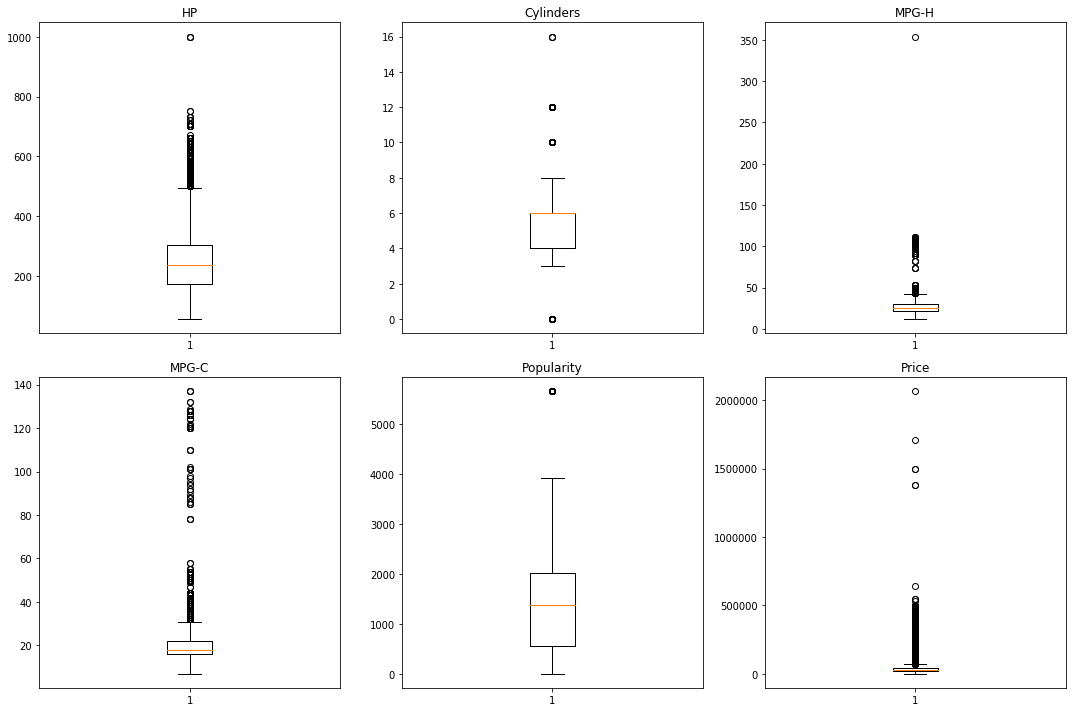

In [18]:
#Boxplots to detect outliers

fig ,ax= plt.subplots(2,3,figsize=(15,10))

ax[0,0].boxplot(x=df['HP'])
ax[0,0].set_title("HP")

ax[0,1].boxplot(x=df['Cylinders'])
ax[0,1].set_title("Cylinders")



ax[0,2].boxplot(x=df['MPG-H'])
ax[0,2].set_title("MPG-H")

ax[1,0].boxplot(x=df['MPG-C'])
ax[1,0].set_title("MPG-C")

ax[1,1].boxplot(x=df['Popularity'])
ax[1,1].set_title("Popularity")

ax[1,2].boxplot(x=df['Price'])
ax[1,2].set_title("Price")



plt.tight_layout() 


In [19]:
#Finding Interquartile range to remove Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
print(iqr)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21395.0
dtype: float64


In [20]:
#Removing Outliers
df=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [21]:
#Chcking shape after removing outliers
df.shape

(8576, 13)

# Step 6
Representation of top car brands and calculating their average prices.

df.value_counts() return a series containing counts of unique values.It can be used to determine most frequently occuring element in the dataset.

In [22]:
#Finding most represented car brand
df["Make"].value_counts()

Chevrolet        1033
Toyota            569
Volkswagen        515
Nissan            513
GMC               469
Dodge             425
Mazda             397
Honda             373
Suzuki            339
Infiniti          322
Cadillac          300
Hyundai           242
Audi              240
Volvo             236
Acura             232
Subaru            220
BMW               218
Kia               216
Buick             184
Mitsubishi        179
Chrysler          173
Mercedes-Benz     171
Lexus             163
Pontiac           156
Lincoln           146
Saab              109
Oldsmobile        105
Land Rover         89
FIAT               59
Scion              55
Plymouth           43
Porsche            36
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

In [23]:
#Calculating average price of top 10 cars
prices=df[["Make","Price"]].loc[(df["Make"]=="Chevrolet")|
                                (df["Make"]=="Toyota")|
                                (df["Make"]=="Volkswagen")|
                                (df["Make"]=="Nissan")|
                                (df["Make"]=="GMC")|
                                (df["Make"]=="Dodge")|
                                (df["Make"]=="Mazda")|
                                (df["Make"]=="Honda")|
                                (df["Make"]=="Suzuki")|
                                (df["Make"]=="Infiniti ") ].groupby("Make").mean()


print(prices)

                   Price
Make                    
Chevrolet   28207.045499
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


# Step 7
Plotting the correlation matrix .

A correlation matrix provides information on the strength and direction (Positive and Negative correlations) of the linear relationship between two variables.If the correlation between two variables is positive then as one variable increases  other variables also increases.If the correlation between two variables is neagative then as one variable increases  other variable decreases.

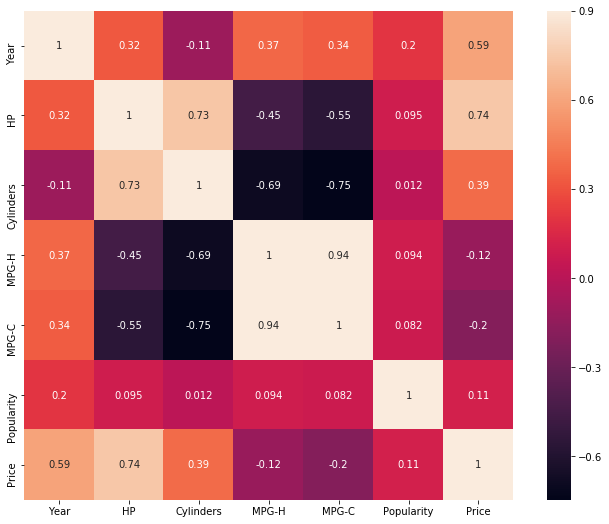

In [24]:
corrmat=df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True,annot=True)

# Following conclusions can be made using Heatmap.
   1.Price is mostly dependent upon features Horse Power and Year.
   Price has positive strong correlation with Horse Power and Year.
      

 2.HP has a strong positive correlation with cylinders and MPG-H has strong positive correlation with MPG-C.If number of cylinders are increased then HP also increases.
  

3.MPG-H and MPG-C have strong negative correlation with feature Cylinders. If number of cylinders are increased then MPG-H and MPG-C decreases.   

# Step 8
Exploratory Data Analysis of the dataset

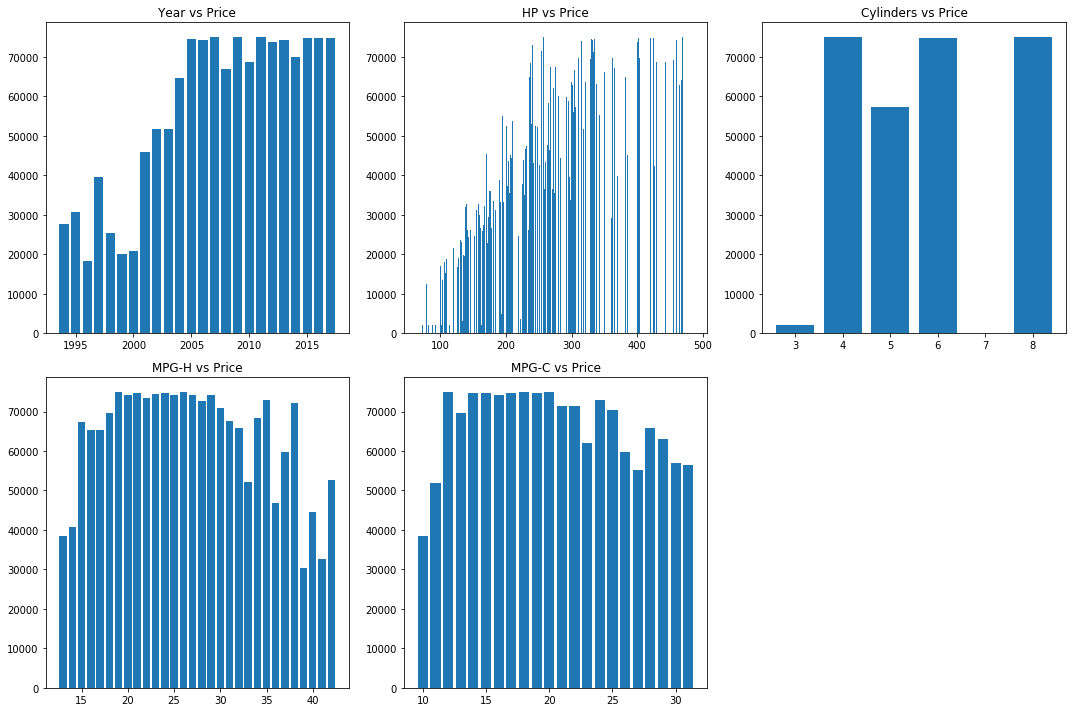

In [25]:
fig ,ax= plt.subplots(2,3,figsize=(15,10))
ax[0,0].bar(df['Year'],df["Price"])
ax[0,0].set_title("Year vs Price")

ax[0,1].bar(df['HP'],df["Price"])
ax[0,1].set_title("HP vs Price")

ax[0,2].bar(df['Cylinders'],df["Price"])
ax[0,2].set_title("Cylinders vs Price")

ax[1,0].bar(df['MPG-H'],df["Price"])
ax[1,0].set_title("MPG-H vs Price")

ax[1,1].bar(df['MPG-C'],df["Price"])
ax[1,1].set_title("MPG-C vs Price")

plt.delaxes(ax[1,2])

plt.tight_layout() 

 # Obsevations 
  

1.Price increases with the year and can be clearly seen in graph.

2.Price also increses with the Engine Horesepower.

3.Price is low for higher values of MPG-H and MPG-C.

#  Step 9 and Step 10
Splitting the Dataset ,builduing a Machine Learning model and checking their performace on different metrics.

Many columns in the dataset consist of catagorical values.This catagorical values are not understadable by machines.Label encoding is needed to convert catagorical values into machine readable form.

In [26]:
data_column_category=df.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
#Creating object instances
label_encoder=LabelEncoder()
for i in data_column_category:
    df[i]=label_encoder.fit_transform(df[i])
    
print("Label Encoded Data")
df.head()

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500


Dataset is splitted into train and test sets .Machine learning model is trained over training set and values of target variables are predicted and evaluated over test data set.

In [28]:
from sklearn.model_selection import train_test_split 

X=df.iloc[:,:-1]
Y=df.iloc[:,-1]



#Splitting the dataset into Training and Test set.
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.2 ,random_state=0)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",Y_train.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (6860, 12)
X_test shape: (1716, 12)
Y_train shape: (6860,)
Y_test shape: (1716,)


# Linear Regression 

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
Y_pred

array([23057.45717274, 36870.58901956, 38944.63791217, ...,
       39788.1479362 , 50732.82795362, 29346.61584126])

In [30]:
from sklearn import metrics
from sklearn.metrics import r2_score
#Checking performace on metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:',r2_score(Y_test,Y_pred))

Mean Absolute Error: 6404.007210325574
Mean Squared Error: 70423124.88727723
Root Mean Squared Error: 8391.848716896488
R2 Score: 0.6812452902346309


The value of R2 score is less and model is not fitted well.

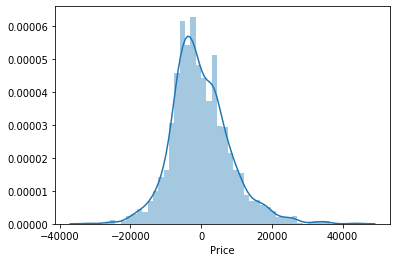

In [31]:
#Distribution plot
sns.distplot((Y_test-Y_pred),bins=50)

#  KNN Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
Y_pred

array([27850, 32990, 30890, ..., 31390, 60395, 30930], dtype=int64)

In [33]:
#Checking performace on metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:',r2_score(Y_test,Y_pred))

Mean Absolute Error: 4303.490093240093
Mean Squared Error: 52650288.10198135
Root Mean Squared Error: 7256.051826026421
R2 Score: 0.7616901077611496


The value of R2 score has increased but still needs to be improved.

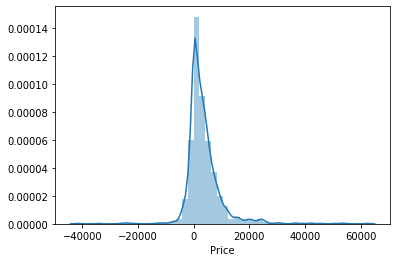

In [34]:
#Distribution plot
sns.distplot((Y_test-Y_pred),bins=50)

# Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor() 
model = decisiontree.fit(X_train, Y_train)
Y_pred= model.predict(X_test)
Y_pred

array([27850.        , 34363.33333333, 32215.        , ...,
       37177.5       , 61982.5       , 34186.42857143])

In [36]:
#Checking performace on metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:',r2_score(Y_test,Y_pred))

Mean Absolute Error: 2791.913998038998
Mean Squared Error: 17694355.848430224
Root Mean Squared Error: 4206.465957122466
R2 Score: 0.9199104090882155


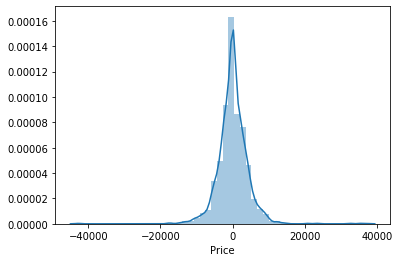

In [37]:
#Distribution plot
sns.distplot((Y_test-Y_pred),bins=50)

# Random Forest Regressor

In [38]:
# Importing random forest class
from sklearn.ensemble import RandomForestRegressor
#1 Create decision tree object
model1=RandomForestRegressor(n_estimators=72)
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
Y_pred

array([28110.21759259, 34417.38277116, 32315.05787037, ...,
       36371.38618827, 61775.13310185, 34278.47972128])

In [39]:
#Checking performace on metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:',r2_score(Y_test,Y_pred))

Mean Absolute Error: 2536.606509278678
Mean Squared Error: 12997249.834464846
Root Mean Squared Error: 3605.1698759510414
R2 Score: 0.9411708212981996


The value of R2 score for Random Forest Regressor is greater than its value for other algorithms.The distribution curve is also normazlied.

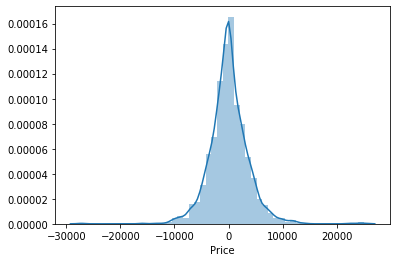

In [40]:
sns.distplot((Y_test-Y_pred),bins=50)